# Visualisation des Distributions de Données

Toute analyse ou modélisation de données doit commencer par comprendre la distribution des variables.

Il existe plusieurs approches pour visualiser une distribution.

In [ ]:
# import seaborn
import seaborn as sns

# set seaborn theme
sns.set_theme(style="darkgrid")

# Dataset

Dans ce qui suit, nous utiliserons le dataset intégré de Seaborn, appelé `penguins`.

Le dataset `penguins` contient des mesures de taille pour trois espèces de manchots observées sur trois îles de l'archipel Palmer, en Antarctique.

Le dataset comprend 7 colonnes :

`species`: espèce de manchot (Chinstrap, Adélie, or Gentoo),
`bill_length_mm`: longueur du bec (mm),
`bill_depth_mm`: profondeur du bec (mm),
`flipper_length_mm`: longueur des nageoires (mm),
`body_mass_g`: masse corporelle (g),
`island`: nom de l'île (Dream, Torgersen ou Biscoe),
`sex`: sexe du manchot.

<br><br>
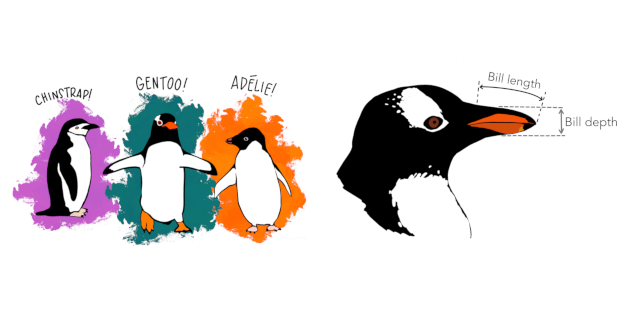
<br><br>

In [ ]:
# load dataframe
penguins = sns.load_dataset('penguins')

# return first rows of dataframe
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Tracé d'histogrammes univariés

Un histogramme est un diagramme à barres dont l'axe représentant la variable de données est divisé en plusieurs compartiments distincts, le nombre d'observations comprises dans chaque compartiment étant indiqué par la hauteur de la barre correspondante.

## Tracer un histogramme

La fonction **`displot()`**, qui utilise le même code sous-jacent que `histplot()`, permet de visualiser un histogramme.

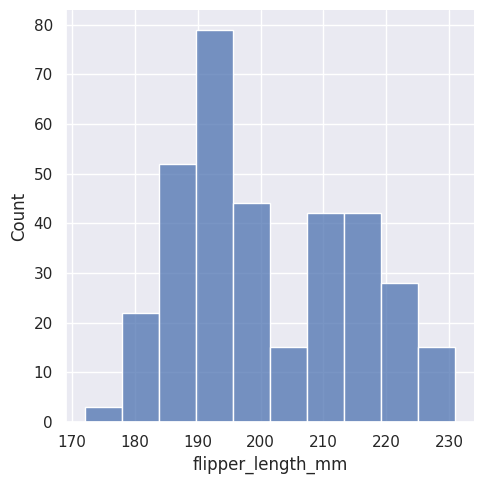

In [ ]:
# set plot
sns.displot(penguins, x="flipper_length_mm")

## Choix de la taille du compartiment

Par défaut, `displot()` choisit une taille de compartiment par défaut en fonction de la variance des données et du nombre d'observations.

Pour choisir directement la taille, définissez le paramètre `binwidth`.

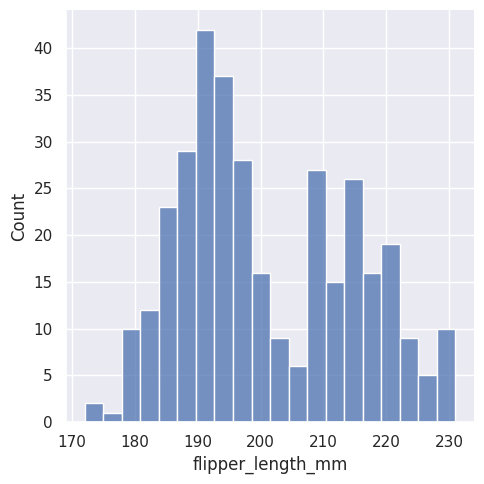

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

Nous pouvons également spécifier le *nombre* de compartiments, plutôt que leur taille.

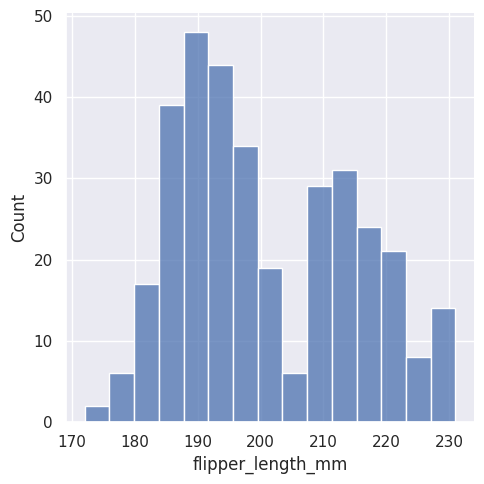

In [ ]:
sns.displot(penguins, x="flipper_length_mm", bins=15)

## Conditionnement sur d'autres variables

La fonction `displot()` prend en charge le sous-ensemble conditionnel via la sémantique `hue`. Affecter une variable à `hue` trace un histogramme distinct pour chacune de ses valeurs uniques et les distingue par une couleur.

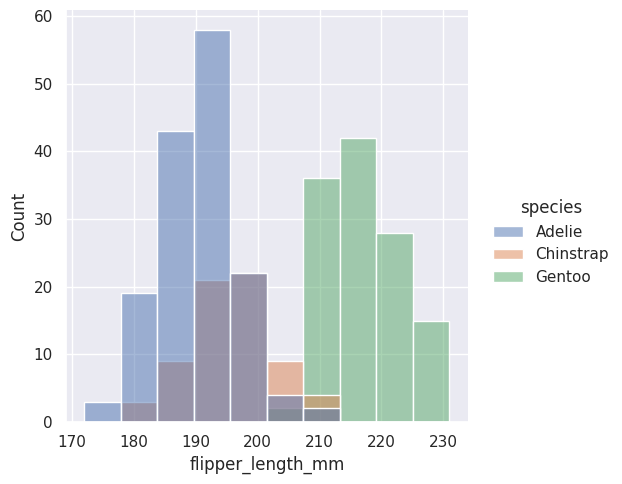

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

Par défaut, les différents histogrammes sont superposés et, dans certains cas, difficiles à distinguer.

Une option consiste à remplacer la représentation visuelle de l'histogramme par un graphique en "paliers":

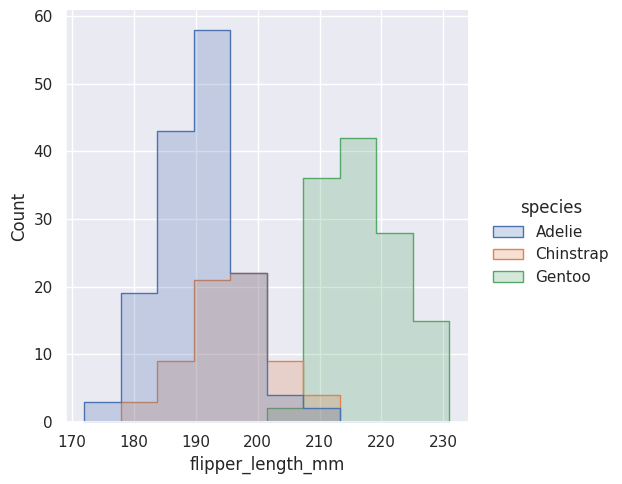

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

Alternativement, au lieu de superposer chaque barre, on peut les "empiler" ou les déplacer verticalement.

Dans ce graphique, le contour de l'histogramme complet correspondra au graphique avec une seule variable:

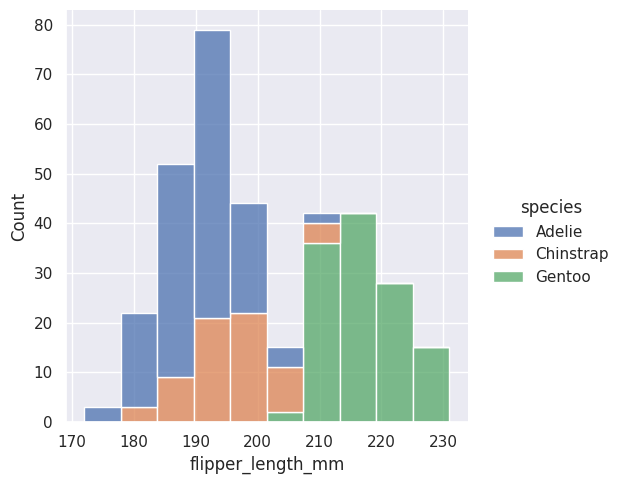

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

Une autre option consiste à "esquiver" (dodge) les barres, ce qui les déplace horizontalement et réduit leur largeur.

Cela garantit l'absence de chevauchement et la comparabilité des hauteurs des barres. Cependant, cette méthode ne fonctionne efficacement que lorsque la variable catégorielle comporte un nombre réduit de niveaux:

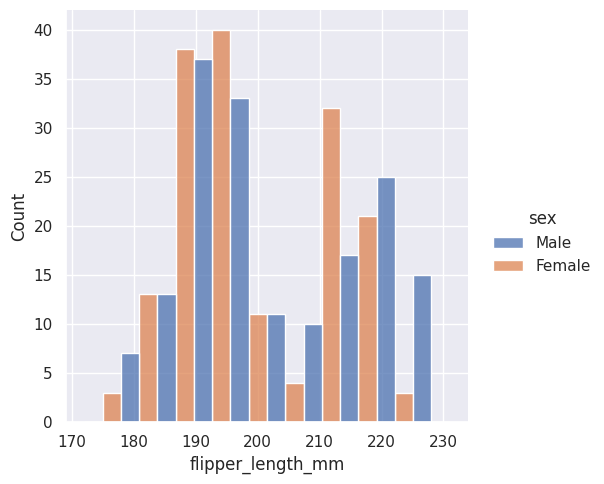

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

Il est également possible de représenter chaque distribution individuelle dans un sous-graphique distinct en affectant la deuxième variable à `col` ou `row` plutôt qu'à `hue` (ou en plus de celle-ci).

Cela représente bien la distribution de chaque sous-ensemble, mais rend les comparaisons directes plus difficiles.

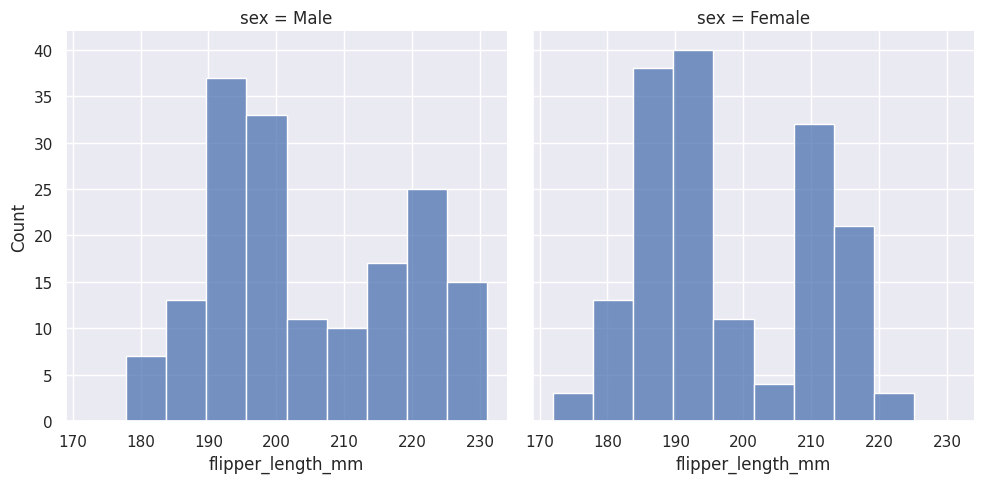

In [ ]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

## Statistiques d'histogramme normalisées

Lorsque les sous-ensembles présentent un nombre inégal d'observations, comparer leurs distributions en termes de nombres peut ne pas être idéal.

Une solution consiste à normaliser les nombres à l'aide du paramètre `stat`:

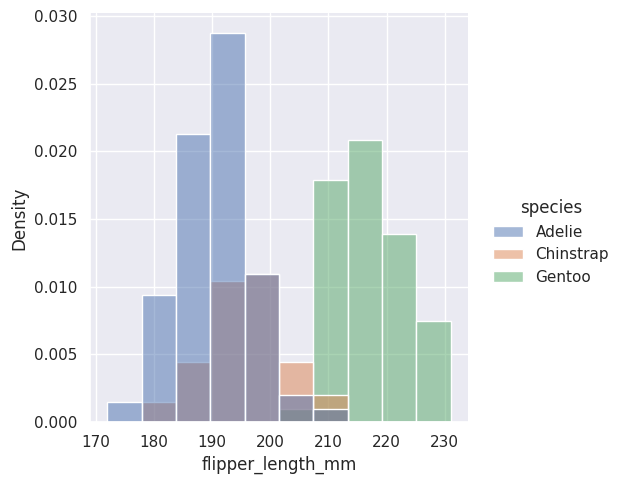

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

Par défaut, la normalisation est appliquée à l'ensemble de la distribution, ce qui modifie simplement la hauteur des barres.

En définissant `common_norm=False`, chaque sous-ensemble sera normalisé indépendamment:

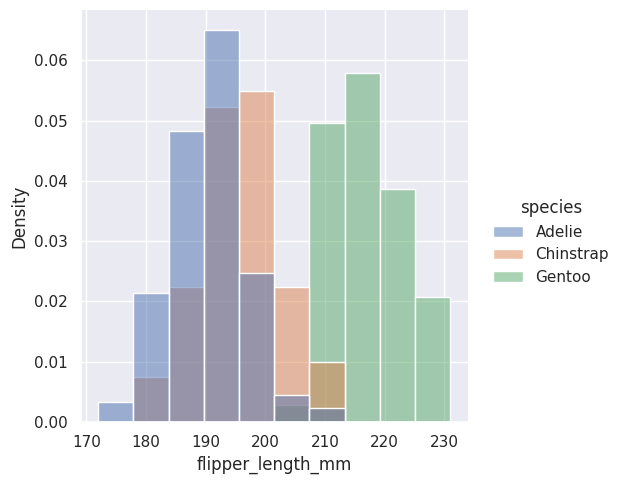

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

La normalisation de la densité met les barres à l'échelle de sorte que leur somme des aires soit égale à 1.

Par conséquent, l'axe de densité n'est pas directement interprétable.

Une autre option consiste à normaliser les barres de sorte que leur somme des hauteurs soit égale à 1.

Cette méthode est particulièrement pertinente lorsque la variable est discrète, mais elle est valable pour tous les histogrammes:

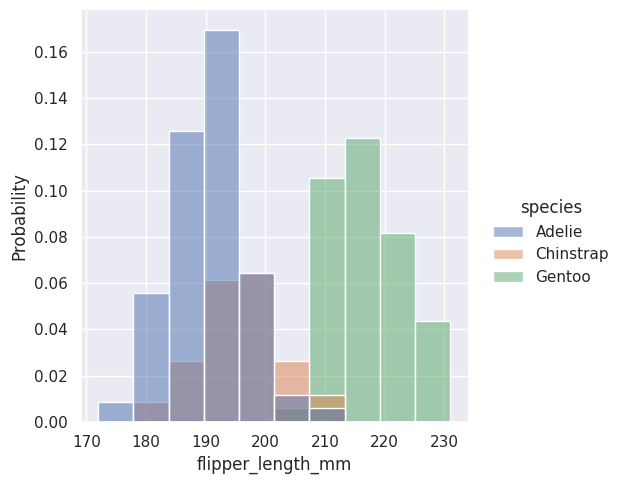

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

# Estimation de la densité du noyau

Un graphique d'estimation de la densité du noyau (Kernel density estimation, KDE) est une méthode permettant de visualiser la distribution des observations dans un dataset, analogue à un histogramme.

KDE représente les données à l'aide d'une courbe de densité de probabilité continue à une ou plusieurs dimensions.

Plutôt que d'utiliser des compartiments discrets, un graphique KDE lisse les observations avec un noyau gaussien, produisant ainsi une estimation de densité continue.

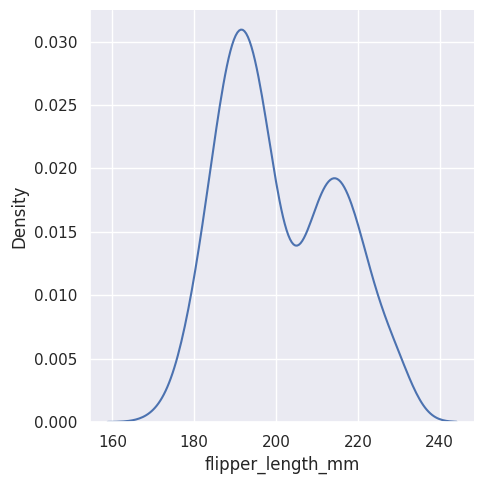

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

## Choix de la bande passante de lissage

Tout comme pour la taille des compartiments dans l'histogramme, la capacité de KDE à représenter les données avec précision dépend du choix de la bande passante de lissage (smoothing bandwidth).

Le paramètre `bw_adjust` est un facteur qui ajuste la valeur de la bande passante de lissage de manière multiplicative. L'augmentation de ce paramètre rend la courbe plus lisse.

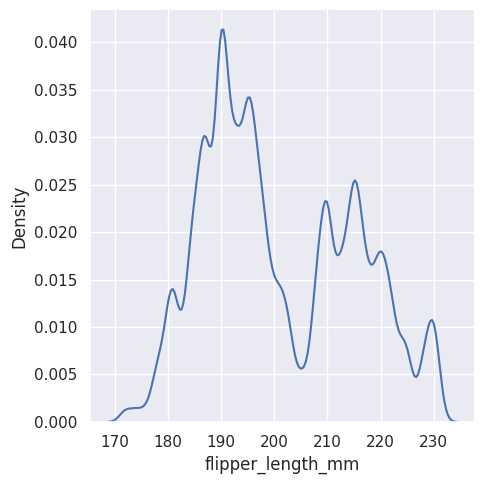

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

## Conditionnement sur d'autres variables

Comme pour les histogrammes, si vous attribuez une variable `hue`, une estimation de densité distincte sera calculée pour chaque niveau de cette variable.

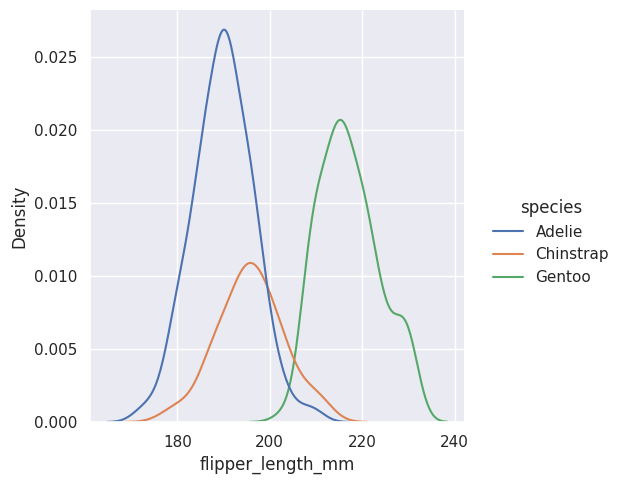

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

Il est possible de remplir les courbes pour des densités simples ou en couches, bien que la valeur alpha par défaut (opacité) soit différente, de sorte que les densités individuelles soient plus faciles à distinguer.

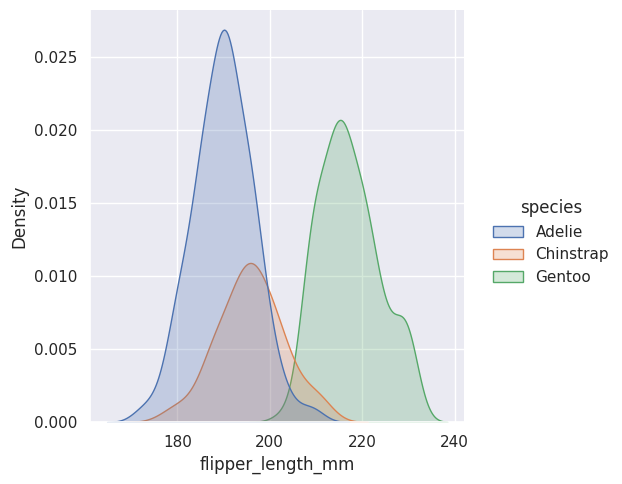

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

# Distributions cumulatives empiriques

Une troisième option pour visualiser les distributions consiste à calculer la fonction de distribution cumulative empirique (empirical cumulative distribution function, ECDF).

Ce graphique trace une courbe monotone croissante passant par chaque point de données, de sorte que la hauteur de la courbe reflète la proportion d'observations présentant une valeur plus faible.

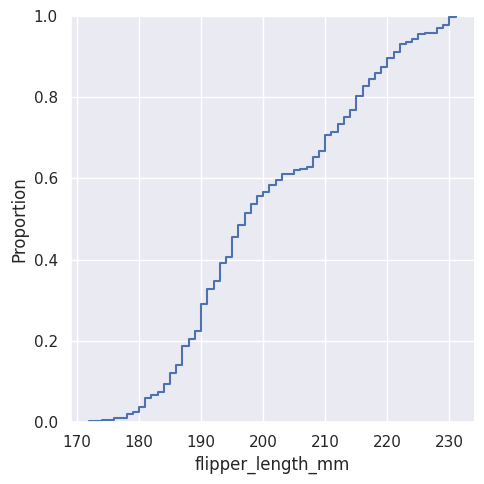

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

Le graphique ECDF présente deux avantages majeurs.

Contrairement à l'histogramme ou à KDE, il représente directement chaque point de données. Cela signifie qu'il n'y a pas de taille de compartiment ni de paramètre de lissage à prendre en compte.

De plus, la courbe étant monotone et croissante, elle est idéale pour comparer plusieurs distributions.

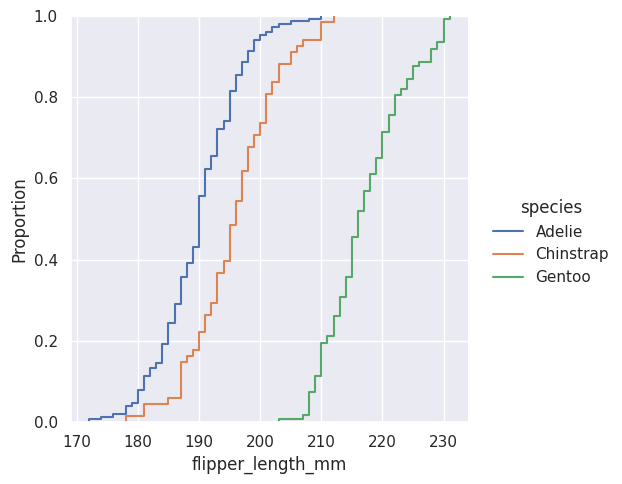

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

# Visualisation des distributions bivariées

Tous les exemples présentés jusqu'à présent ont considéré des distributions univariées: des distributions d'une seule variable, éventuellement conditionnées par une seconde variable affectée à `hue`.

En revanche, l'affectation d'une seconde variable à `y` tracera une distribution bivariée.

## Histogramme bivarié

Un histogramme bivarié classe les données dans des rectangles qui jalonnent le graphique, puis affiche le nombre d'observations dans chaque rectangle avec la couleur de remplissage (à l'instar d'une carte thermique).

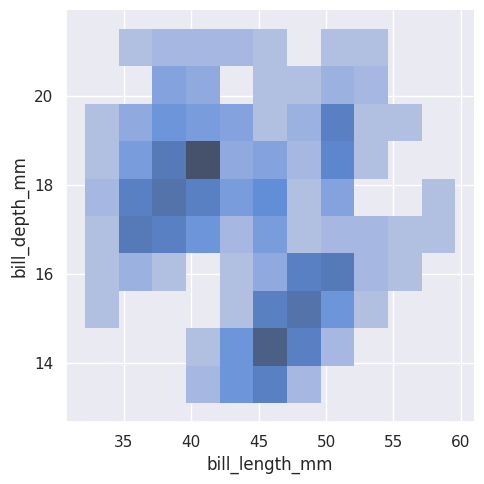

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

## KDE bivarié

De même, un graphique KDE bivarié lisse les observations (x, y) avec une gaussienne 2D.

Dans un graphique KDE bivarié, la représentation par défaut affiche les contours de la densité 2D.

La figure suivante illustre une distribution gaussienne bivariée.

<br><br>
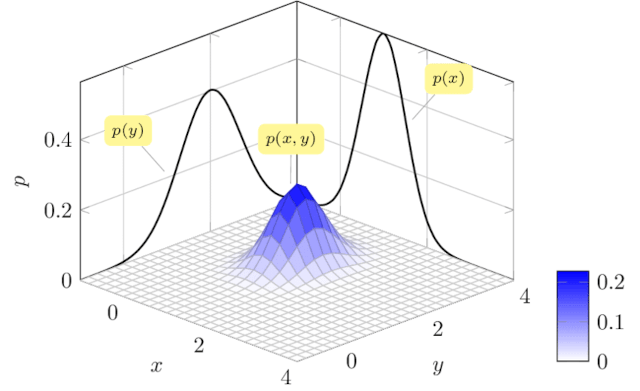
<br><br>

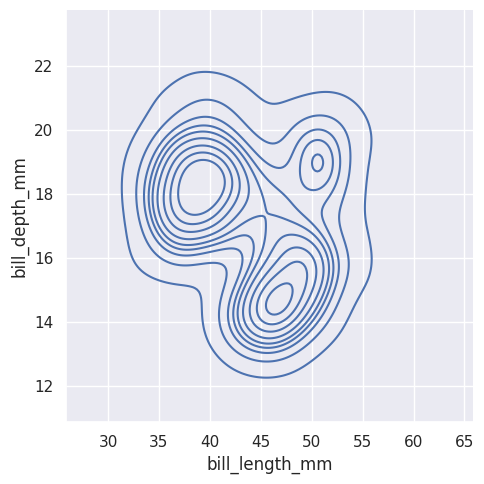

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

L'attribution d'une variable `hue` tracera plusieurs cartes thermiques ou ensembles de contours en utilisant différentes couleurs.

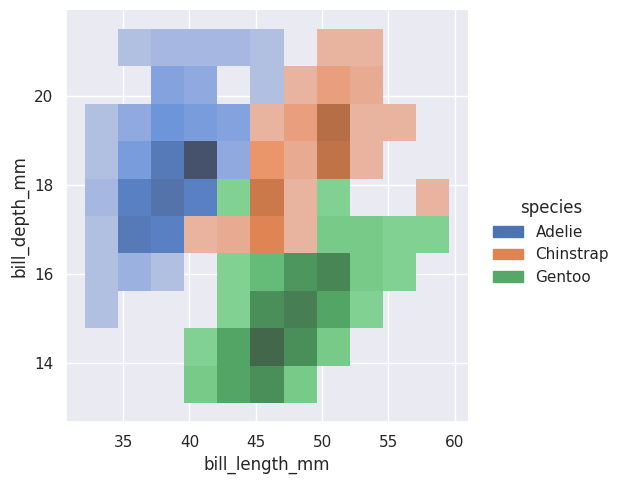

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

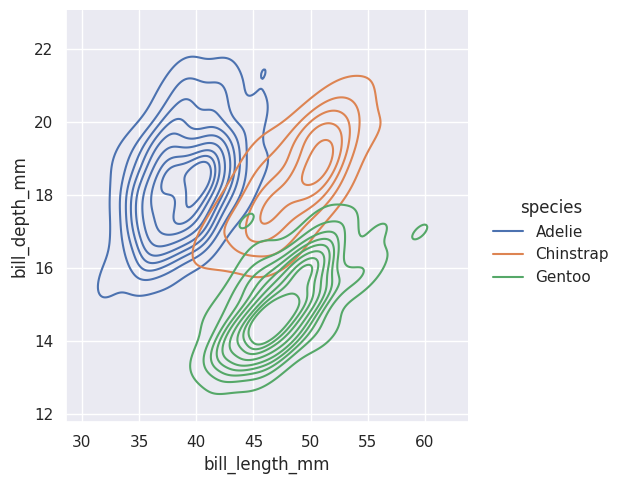

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

Tout comme pour les graphiques univariés, le choix de la taille des compartiments ou de la bande passante de lissage déterminera la qualité de la représentation de la distribution bivariée sous-jacente par le graphique.

Les mêmes paramètres s'appliquent, mais ils peuvent être ajustés pour chaque variable en transmettant une paire de valeurs.

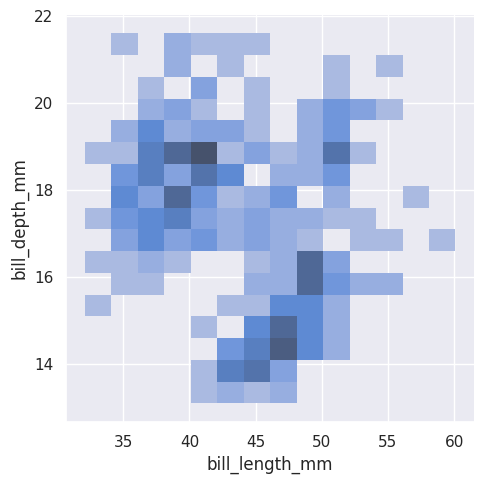

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

Pour faciliter l’interprétation de la carte thermique, ajoutez une barre de couleurs pour afficher la correspondance entre les comptages et l’intensité des couleurs.

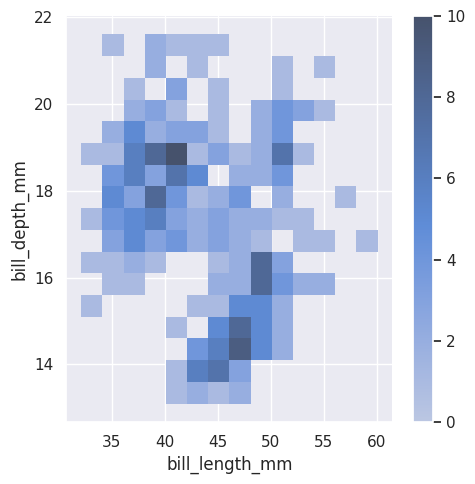

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

# Visualisation de la distribution dans d'autres paramètres

Plusieurs autres fonctions de traçage au niveau des figures dans Seaborn utilisent les fonctions `histplot()` et `kdeplot()`.

## Tracé des distributions conjointes et marginales

La première méthode est `jointplot()`, qui enrichit un graphique relationnel ou de distribution bivarié avec les distributions marginales des deux variables.

Par défaut, `jointplot()` représente la distribution bivariée à l'aide de `scatterplot()` et les distributions marginales à l'aide de `histplot()`.

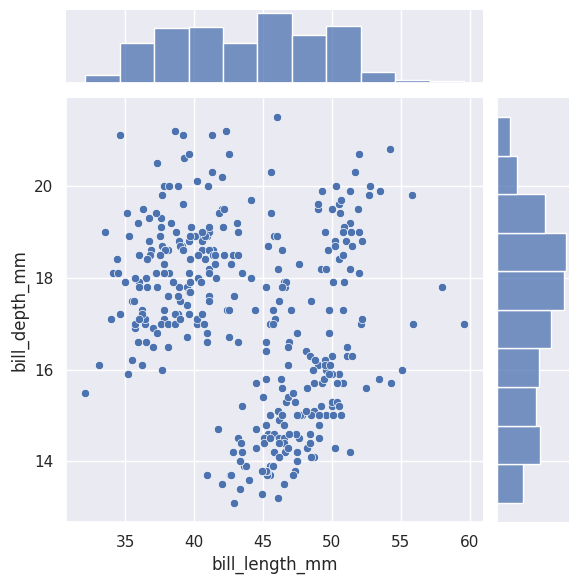

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Similaire à `displot()`, définir un `kind="kde"` différent dans `jointplot()` modifiera les tracés conjoints et marginaux.

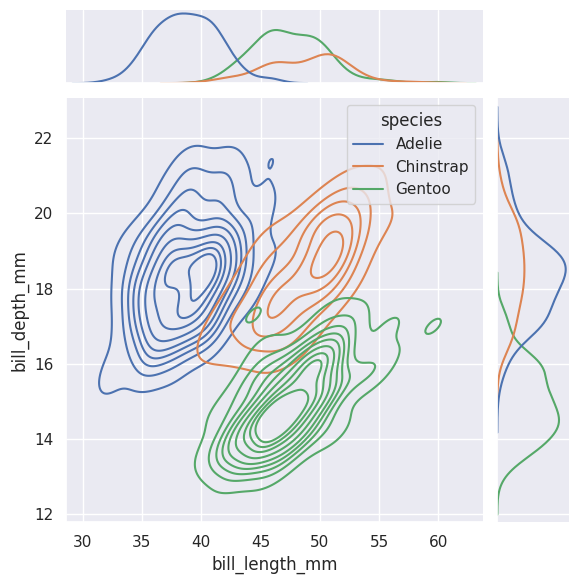

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

Nous pouvons montrer les distributions marginales en utilisant un graphique "tapis", qui ajoute une petite coche sur le bord du graphique pour représenter chaque observation individuelle.

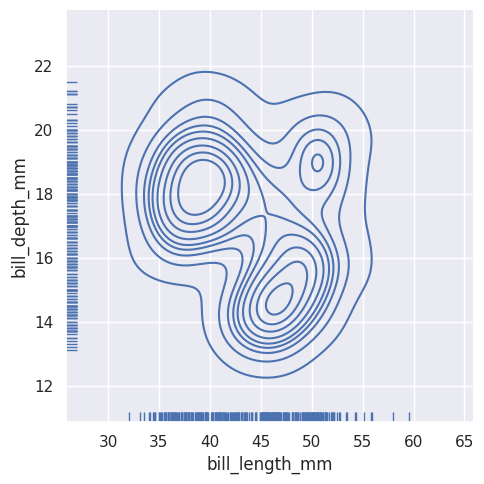

In [ ]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

## Tracé de plusieurs distributions

La fonction **`pairplot()`** offre une combinaison similaire de distributions conjointes et marginales.

Plutôt que de se concentrer sur une seule relation, `pairplot()` utilise une approche "petit multiple" pour visualiser la distribution univariée de toutes les variables d'un ensemble de données, ainsi que toutes leurs relations par paires.

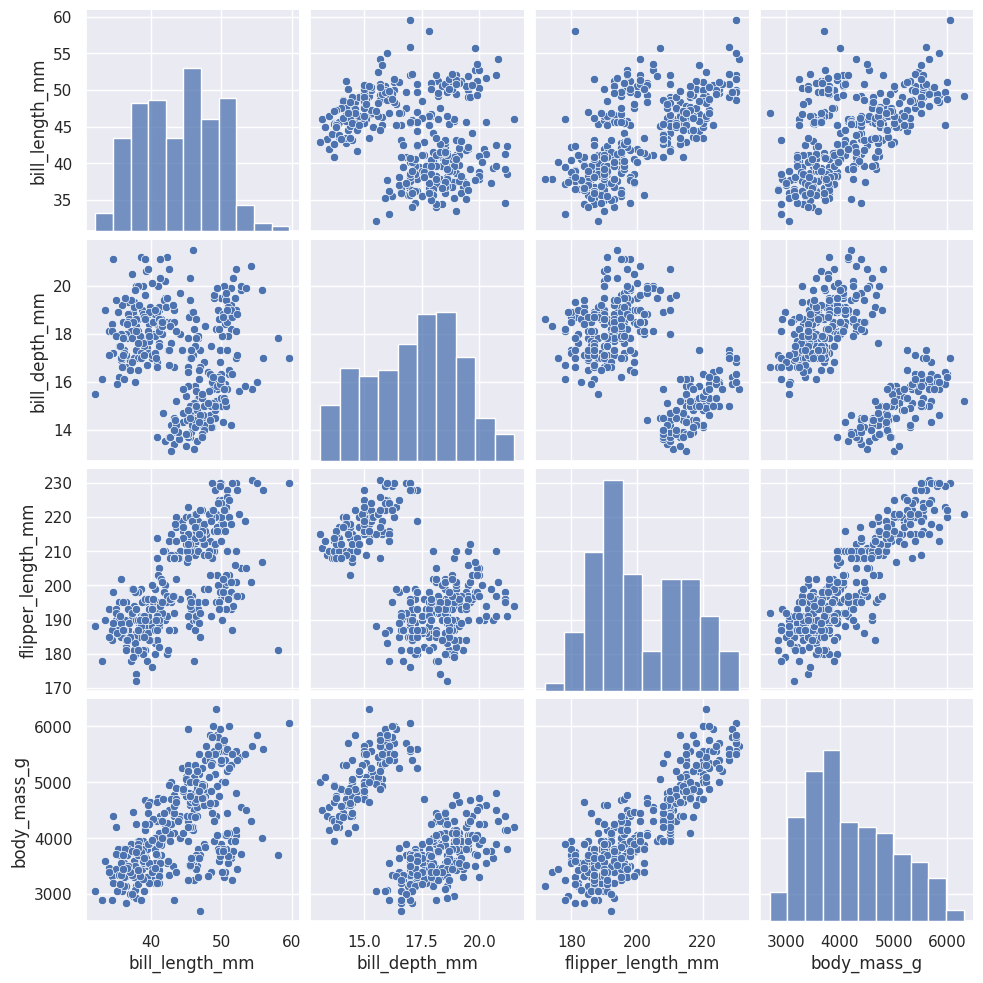

In [ ]:
sns.pairplot(penguins)